In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL as pl
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Flatten, Dense, Dropout

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

2024-03-12 17:35:29.212815: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 17:35:29.212957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 17:35:29.484348: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/IQ-OTH_NCCD lung cancer dataset.txt
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (246).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (155).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (311).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (45).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (298).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (359).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (230).jpg
/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-O

In [2]:
!nvidia-smi

Tue Mar 12 17:35:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

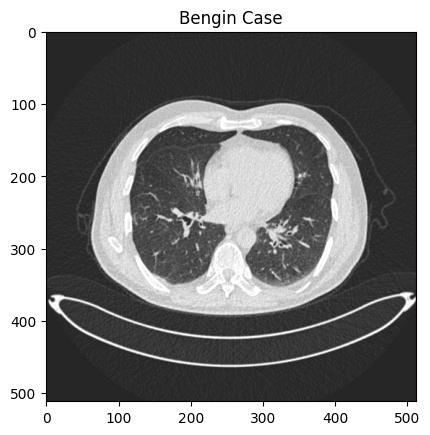

In [3]:
img = cv2.imread('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (10).jpg')
plt.title('Bengin Case')
plt.imshow(img, label = 'Bengin Case')

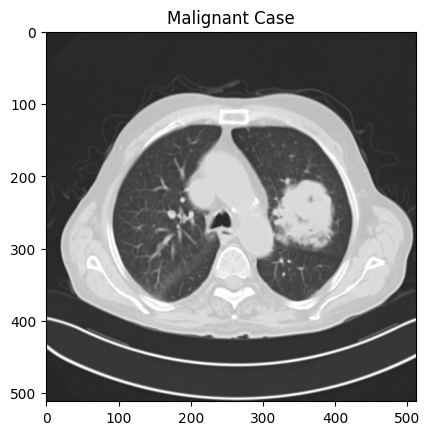

In [4]:
img = cv2.imread('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (10).jpg')
plt.title('Malignant Case')
plt.imshow(img)

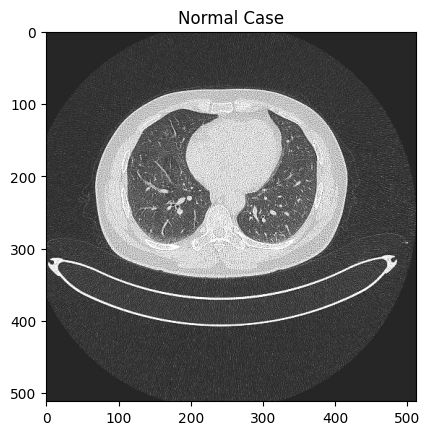

In [5]:
img = cv2.imread('/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (100).jpg')
plt.title('Normal Case')
plt.imshow(img)

In [6]:
img.shape

(512, 512, 3)

In [7]:
dir = '/kaggle/input/the-iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset'
img_width = 256
img_height = 256

In [8]:
# Second section of the path
categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

# Now we get the images using complete path and store the images into img_data folder.
img_data = []
for cata in categories:
    folder = os.path.join(dir, cata)
    label = categories.index(cata)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)

        try:
            # Attempt to read and resize the image
            img_array = cv2.imread(img_path)
            img_array = cv2.resize(img_array, (img_height, img_width))

            # Check if the image array is not empty
            if img_array is not None and not img_array.size == 0:
                img_data.append([img_array, label])

        except Exception as e:
            continue

In [9]:
random.shuffle(img_data)

In [10]:
x=[]
y=[]
for features,labels in img_data:
    x.append(features)
    y.append(labels)
    
#Convert X and Y list into array
X=np.array(x, dtype = float)
Y=np.array(y, dtype = float)

In [11]:
print(X[19])

[[[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 ...

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]

 [[38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]
  ...
  [38. 38. 38.]
  [38. 38. 38.]
  [38. 38. 38.]]]


In [12]:
for i in range(len(X)):
    X[i] = X[i]/255.0

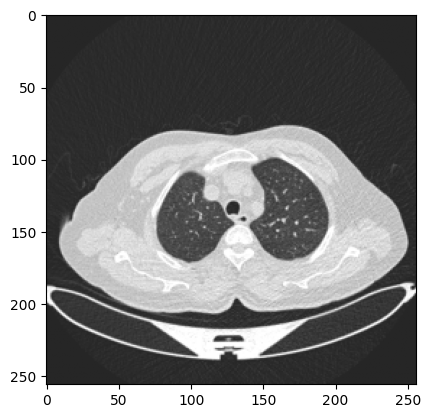

In [13]:
plt.imshow(X[19])

In [14]:
print(X[19])

[[[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 ...

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  ...
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]]

 [[0.14901961 0.14901961 0.14901961]
  [0.14901961 0.14901961 0.14901961]


In [15]:
X.shape

(1097, 256, 256, 3)

In [16]:
x, x_test, y, y_test = train_test_split(X, Y, test_size = 0.2)

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(128, (3, 3), padding = 'same', input_shape = X.shape[1: ], activation = 'relu'))
model.add(AvgPool2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.2, seed = 12))
model.add(Dense(3000, activation = 'relu'))
model.add(Dense(1500, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [20]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 128, 128, 128)  │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3000)           │    49,155,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1500)           │     4,501,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,365,643 (207.39 MB)

 Trainable params: 54,365,643 (207.39 MB)

 Non-trainable params: 0 (0.00 B)

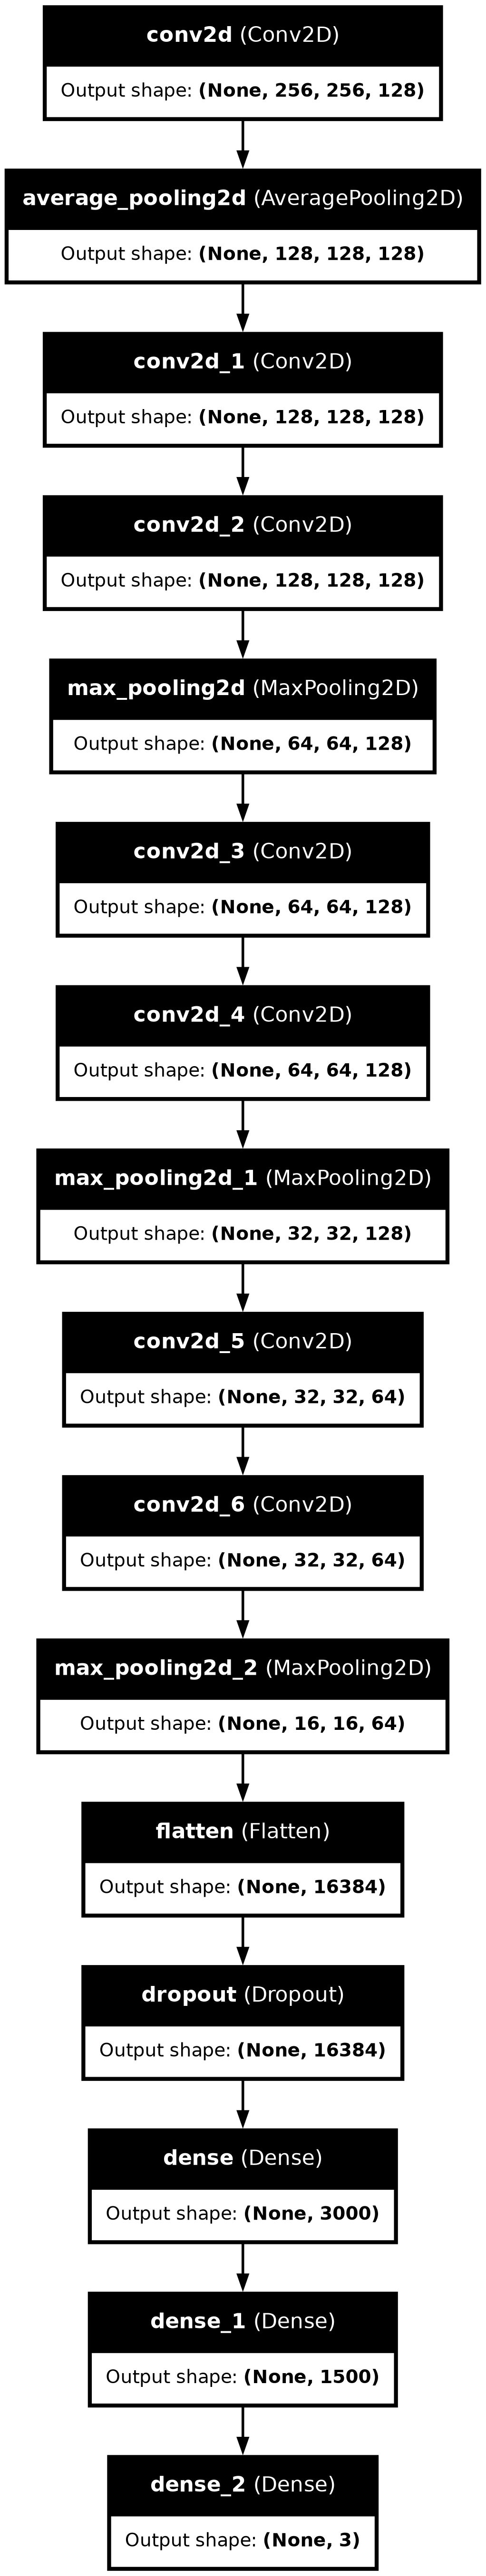

In [22]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val),epochs = 15)

Epoch 1/15


I0000 00:00:1710265011.206543      83 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710265011.227719      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.4417 - loss: 1.1737

W0000 00:00:1710265046.870486      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4441 - loss: 1.1686   

W0000 00:00:1710265048.181768      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


22/22 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.4464 - loss: 1.1640 - val_accuracy: 0.4545 - val_loss: 0.9620
Epoch 2/15


W0000 00:00:1710265055.381532      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - accuracy: 0.4955 - loss: 0.9574 - val_accuracy: 0.5852 - val_loss: 0.8299
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.5633 - loss: 0.8986 - val_accuracy: 0.6875 - val_loss: 0.7634
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.6583 - loss: 0.8003 - val_accuracy: 0.7443 - val_loss: 0.6481
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.7641 - loss: 0.6076 - val_accuracy: 0.8636 - val_loss: 0.3405
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.8280 - loss: 0.4268 - val_accuracy: 0.7955 - val_loss: 0.8133
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.8302 - loss: 0.5567 - val_accuracy: 0.8580 - val_loss: 0.3107
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.9029 - loss: 0.2601 - val_accuracy: 0.9148 - val_loss: 0.1612
Epoch 9/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.9364 - loss: 0.1621 - val_accuracy: 0.8920 - val_

In [24]:
model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9710 - loss: 0.1123


W0000 00:00:1710265140.280534      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.1103539988398552, 0.9772727489471436]

In [25]:
result = model.predict(x_test)

4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

W0000 00:00:1710265141.469160      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


W0000 00:00:1710265142.248509      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


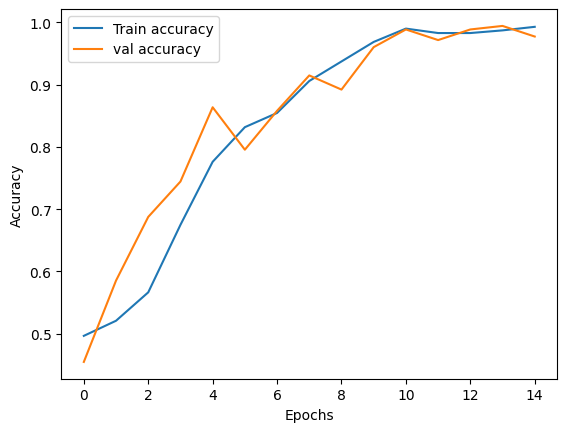

In [26]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')

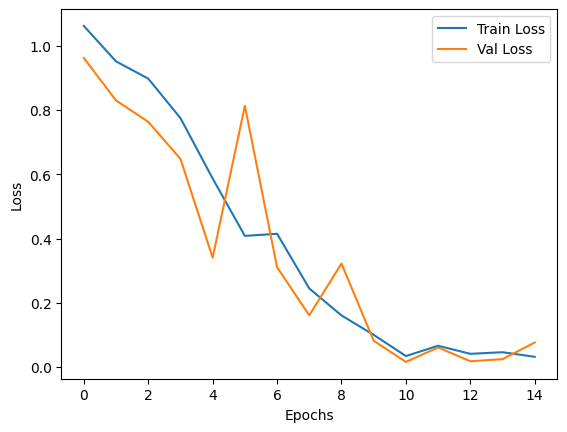

In [27]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')